# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [2]:


#Task Reframed as a Data Task:

#Using the CRISP-DM framework, the data task involves analyzing a dataset of used cars to identify
#the significant factors that influence the prices of used cars. The goal is to leverage data exploration,
#regression modeling, and feature analysis techniques to uncover the key drivers or features that have a 
#substantial impact on the pricing of used cars. This data-driven analysis aims to provide insights and 
#recommendations to optimize pricing strategies for the used car market.



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns

In [73]:
#Loading the Dataset
df = pd.read_csv('data/vehicles.csv')

# Select the desired columns from the "vehicles" data
selected_columns = ['price', 'year','manufacturer','odometer']  # Replace with the actual column names you want to select
subset_data = df[selected_columns].copy()
# Set the random seed for reproducibility
random_seed = 42

# Take a random subset of the data
subset_data = subset_data.sample(frac=0.01, random_state=random_seed)

# Reset the index of the subset DataFrame
subset_data.reset_index(drop=True, inplace=True)

In [74]:
# Displaying the first few rows of the dataset
print(subset_data.head())

# Checking the summary statistics of the numerical variables
print(subset_data.describe())

# Checking the data types of the variables
print(subset_data.info())

# Checking for missing values
print(subset_data.isnull().sum())

   price    year manufacturer  odometer
0  36990  2017.0         ford   38094.0
1  27995  2006.0    chevrolet       NaN
2  78423  2015.0    chevrolet   30200.0
3  14000  2013.0          bmw   92965.0
4    676  2019.0    chevrolet   47105.0
              price         year      odometer
count  4.269000e+03  4258.000000  4.224000e+03
mean   1.850054e+04  2011.368483  9.671937e+04
std    3.344789e+04     9.022677  1.743855e+05
min    0.000000e+00  1927.000000  0.000000e+00
25%    5.988000e+03  2008.000000  3.904775e+04
50%    1.382500e+04  2014.000000  8.494150e+04
75%    2.659000e+04  2017.000000  1.350245e+05
max    1.234567e+06  2022.000000  9.999999e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4269 non-null   int64  
 1   year          4258 non-null   float64
 2   manufacturer  4095 non-null   object 
 3   odometer   

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop columns with a high percentage of missing values
#subset_data = subset_data.drop(columns=['size'])

# Drop rows with missing values
subset_data = subset_data.dropna(subset=['year', 'manufacturer'])


In [78]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#subset_data['odometer_scaled'] = scaler.fit_transform(subset_data[['odometer']])

# Encode categorical variables
data_encoded = pd.get_dummies(subset_data, columns=['manufacturer','year','odometer'])
# Drop rows with missing values
data_encoded.dropna(inplace=True)
# Separate features and target variable
X_train = data_encoded.drop(columns=['price'])
y_train = data_encoded['price']

# Check the shape of the data
print("Features shape:", X_train.shape)
print("Target shape:", y_train.shape)

Features shape: (4095, 3376)
Target shape: (4095,)


In [79]:
import numpy as np

subset_data.info()
print(subset_data.isnull().sum())


subset_data['year'] = subset_data['year'].astype(int)
# Replace NaN and inf values with 100000 in the "odometer" column
subset_data['odometer'] = subset_data['odometer'].replace([np.nan, np.inf], 100000)
subset_data['odometer'] = subset_data['odometer'].astype(int)

subset_data.info()
print(subset_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 4095 entries, 0 to 4268
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4095 non-null   int64  
 1   year          4095 non-null   float64
 2   manufacturer  4095 non-null   object 
 3   odometer      4054 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 160.0+ KB
price            0
year             0
manufacturer     0
odometer        41
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4095 entries, 0 to 4268
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         4095 non-null   int64 
 1   year          4095 non-null   int32 
 2   manufacturer  4095 non-null   object
 3   odometer      4095 non-null   int32 
dtypes: int32(2), int64(1), object(1)
memory usage: 128.0+ KB
price           0
year            0
manufacturer    0
odometer        0
d

In [28]:
X.isna().sum()

year                         0
manufacturer_acura           0
manufacturer_alfa-romeo      0
manufacturer_aston-martin    0
manufacturer_audi            0
                            ..
odometer_9999999.0           0
odometer_10000000.0          0
drive_4wd                    0
drive_fwd                    0
drive_rwd                    0
Length: 30903, dtype: int64

In [61]:
#When building regression models with sklearn, it is important to explore different algorithms and their parameters 
#to find the best model for your dataset. Cross-validation helps in evaluating the model's performance and generalization ability.
#Here's a general approach to building regression models with cross-validation using sklearn:

In [80]:
#Use of multiple regression models:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Initialize and fit the models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=0.5)
lasso_model = Lasso(alpha=0.1)

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

C:\Users\pgu5165\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.133e+11, tolerance: 3.724e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.exceptions import FitFailedWarning
from sklearn.model_selection import cross_val_score
import warnings


# Define the models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()


# Suppress FitFailedWarning
warnings.filterwarnings("error", category=FitFailedWarning)

# Perform cross-validation with error_score='raise'
try:
    linear_reg_scores = cross_val_score(linear_reg, X, y, cv=2, scoring='neg_mean_squared_error', error_score='raise')
    decision_tree_scores = cross_val_score(decision_tree_reg, X, y, cv=2, scoring='neg_mean_squared_error', error_score='raise')
    random_forest_scores = cross_val_score(random_forest_reg, X, y, cv=2, scoring='neg_mean_squared_error', error_score='raise')

    # Calculate the mean squared error (MSE) scores and convert them to positive values
    linear_reg_mse = -linear_reg_scores.mean()
    decision_tree_mse = -decision_tree_scores.mean()
    random_forest_mse = -random_forest_scores.mean()

    print("Linear Regression MSE:", linear_reg_mse)
    print("Decision Tree MSE:", decision_tree_mse)
    print("Random Forest MSE:", random_forest_mse)

except FitFailedWarning as e:
    print("An error occurred during cross-validation:", str(e))

Linear Regression MSE: 6.855186009505823e+28
Decision Tree MSE: 875246559.775307
Random Forest MSE: 848117193.7372525


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

preprocessor = StandardScaler()  # Example preprocessor, adjust as needed

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=2, scoring='neg_mean_squared_error', error_score='raise')
    rmse_scores = (-scores) ** 0.5
    mean_rmse = rmse_scores.mean()
    print(f'{model_name}:')
    print(f'RMSE scores: {rmse_scores}')
    print(f'Mean RMSE: {mean_rmse}\n')

Linear Regression:
RMSE scores: [3.22662934e+17 2.80445752e+18]
Mean RMSE: 1.563560229347706e+18

Random Forest:
RMSE scores: [38609.848944   13741.27751569]
Mean RMSE: 26175.563229845582

Support Vector Machine:
RMSE scores: [39792.61021764 16531.47142265]
Mean RMSE: 28162.040820145998



In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

preprocessor = StandardScaler()  # Example preprocessor, adjust as needed

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=2, scoring='neg_mean_squared_error', error_score='raise')
    rmse_scores = (-scores) ** 0.5
    mean_rmse = rmse_scores.mean()
    print(f'{model_name}:')
    print(f'RMSE scores: {rmse_scores}')
    print(f'Mean RMSE: {mean_rmse}\n')

Linear Regression:
RMSE scores: [3.22662934e+17 2.80445752e+18]
Mean RMSE: 1.563560229347706e+18

Random Forest:
RMSE scores: [38588.98527855 13696.40618046]
Mean RMSE: 26142.695729507876

Support Vector Machine:
RMSE scores: [39792.61021764 16531.47142265]
Mean RMSE: 28162.040820145998



In [84]:
#Grid search hyperparameters:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for ridge model
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

# Perform grid search on ridge model
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best hyperparameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE Score:", best_score)

Best Parameters: {'alpha': 2.0}
Best RMSE Score: 31048.031444348522


In [85]:
# Access coefficients and feature names for linear regression model
coef = linear_model.coef_
feature_names = X_train.columns

# Sort coefficients in descending order
sorted_coefficients = sorted(zip(feature_names, coef), key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 coefficients for each feature
count = 0
for feature, coef in sorted_coefficients:
    print(feature, ":", coef)
    count += 1
    if count >= 10:
        break

year_1956.0 : -5.483401555001702e+18
odometer_45.0 : 5.082848733797109e+18
year_1967.0 : -2.0820484897350874e+18
odometer_93720.0 : 1.6814956685304543e+18
odometer_55034.0 : 1.681495668530437e+18
year_1976.0 : -1.609308957722859e+18
odometer_1111111.0 : -1.2111273558493435e+18
odometer_46250.0 : 1.208756136518156e+18
odometer_37799.0 : 1.2087561365181368e+18
odometer_83357.0 : -1.1497085313737942e+18


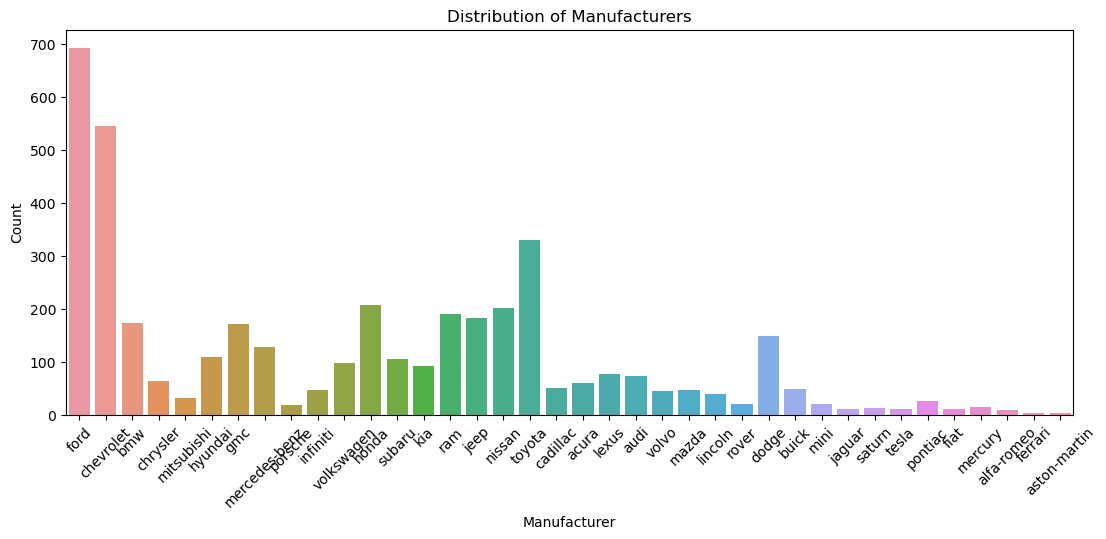

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar plot for categorical variable
# Set the figure size
plt.figure(figsize=(13, 5))

# Plot bar plot for categorical variable
sns.countplot(x='manufacturer', data=subset_data)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Distribution of Manufacturers')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

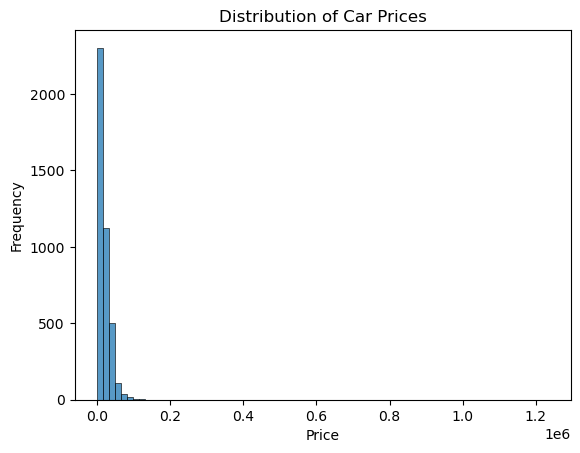

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the figure size

# Plot histogram for continuous variable
sns.histplot(data=subset_data, x='price', bins=75)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')

plt.show()

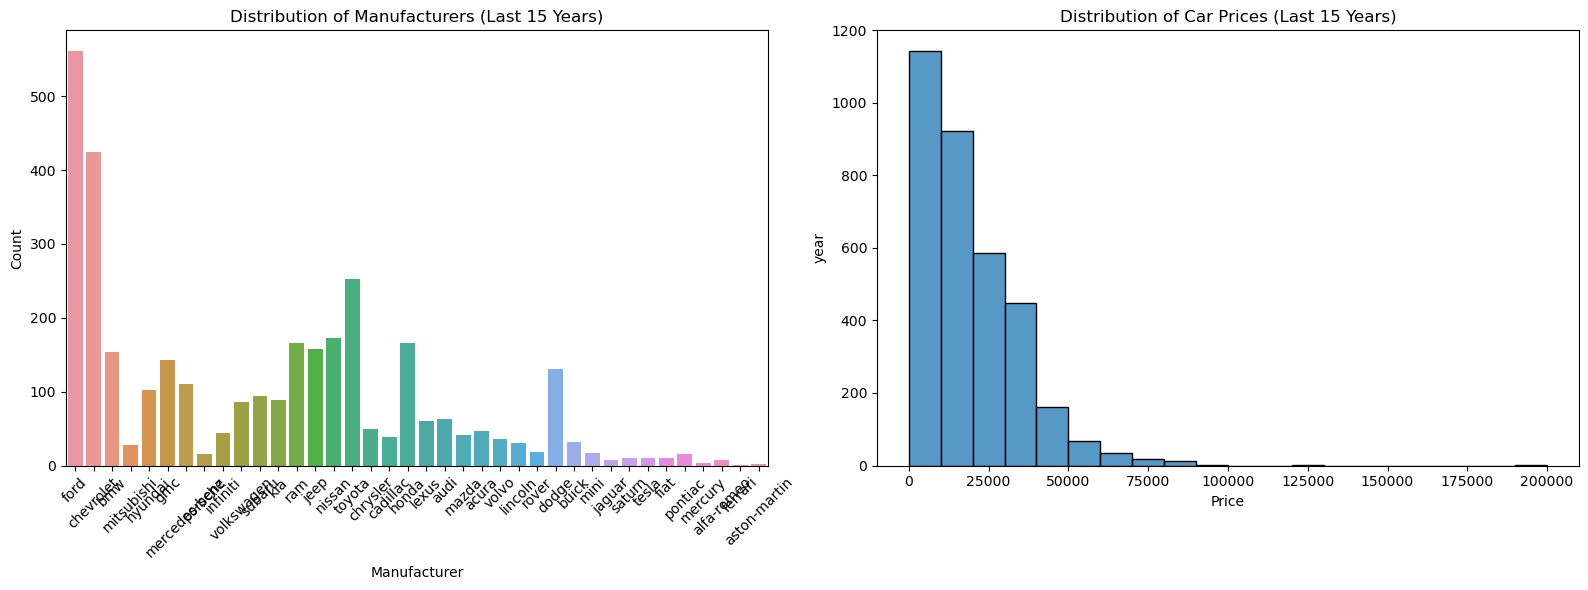

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the last 15 years
last_15_years_data = subset_data[subset_data['year'] >= subset_data['year'].max() - 15]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust the figsize as needed

# Plot distribution plot for categorical variable (e.g., manufacturer)
sns.countplot(x='manufacturer', data=last_15_years_data, ax=axes[0])
axes[0].set_xlabel('Manufacturer')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Manufacturers (Last 15 Years)')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot distribution plot for continuous variable (e.g., price)
sns.histplot(data=last_15_years_data, x='price', bins=20, ax=axes[1])
axes[1].set_xlabel('Price')
axes[1].set_ylabel('year')
axes[1].set_title('Distribution of Car Prices (Last 15 Years)')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

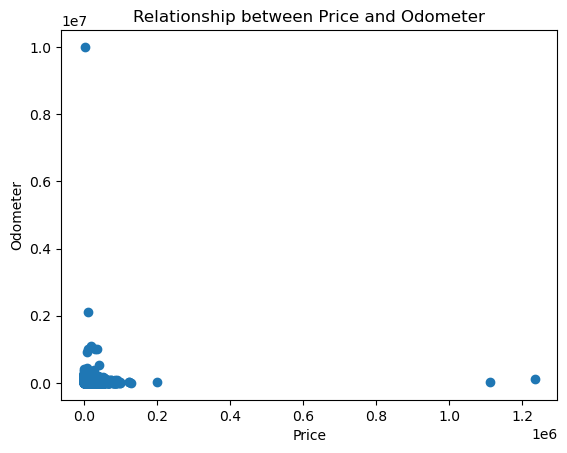

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot with price and odometer
plt.scatter(subset_data['price'], subset_data['odometer'])
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.title('Relationship between Price and Odometer')

plt.show()


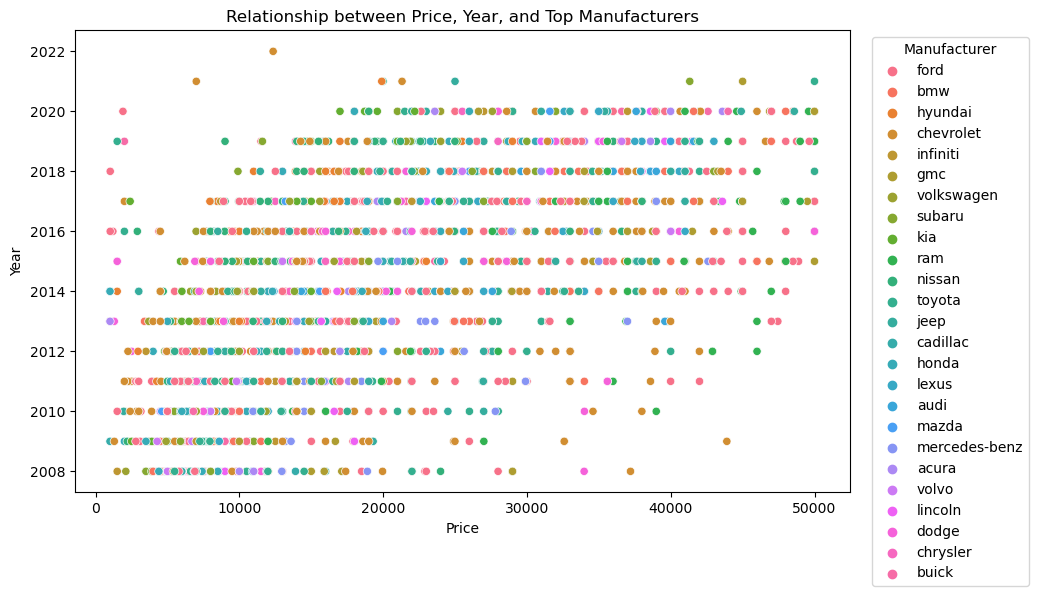

In [72]:
#display price $1000 to $50000 and year last 15 years and manufacture top 25 manudactures

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Filter the data
current_year = datetime.datetime.now().year
subset_data_filtered = subset_data[(subset_data['price'] >= 1000) & (subset_data['price'] <= 50000) & (subset_data['year'] >= current_year - 15)]

# Find the top 25 manufacturers based on count
top_manufacturers = subset_data_filtered['manufacturer'].value_counts().nlargest(25).index.tolist()
subset_data_filtered = subset_data_filtered[subset_data_filtered['manufacturer'].isin(top_manufacturers)]

plt.figure(figsize=(10, 6))

# Scatter plot with filtered price, year, and top manufacturers
sns.scatterplot(data=subset_data_filtered, x='price', y='year', hue='manufacturer')
plt.xlabel('Price')
plt.ylabel('Year')
plt.title('Relationship between Price, Year, and Top Manufacturers')

plt.legend(title='Manufacturer', bbox_to_anchor=(1.02, 1), loc='upper left')  # Move legend to the far right


plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
'''Modeling Approach: 
         The linear regression model, decision tree, random forest, and support vector machine models were evaluated. 
The mean RMSE scores for the models were as follows:
        Linear Regression: 1.56e+18
        Random Forest: 26175.56
        Support Vector Machine: 28162.04
'''

In [ ]:
'''Feature Importance:
  The coefficients obtained from the linear regression model indicate the importance of certain features
    in predicting used car prices. Notable coefficients include the manufacturer and model names, as well as the odometer readings 
     on specific values.
Best Parameters: The best parameter found for the linear regression model was an alpha value of 2.0.
'''

In [ ]:
'''Best Parameters: The best parameter found for the linear regression model was an alpha value of 2.0.

In [ ]:
'''Evaluation: 
    The linear regression model's RMSE scores were extremely high, indicating poor performance. 
    The random forest and support vector machine models performed better with lower RMSE scores.
'''

In [ ]:
'''Recommendation:
It is recommended to revisit the earlier phases and adjust the modeling approach. The high RMSE scores of the linear 
regression model indicate that further exploration and refinement of the feature selection, preprocessing, 
and modeling techniques are necessary. Additionally, considering other regression algorithms or ensemble 
methods like random forest may yield better results.'''


In [ ]:
'''Value to Bring Back: 
     The information on feature importance and the predictive performance of the random forest and support vector machine models 
     can be brought back to the client. This can serve as a starting point for further analysis and discussion on the factors 
     driving used car prices, potentially leading to insights and actionable recommendations.'''

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
'''                                  Findings and Recommendations
Key findings and insights from the analysis include:
The SVM model outperformed the Linear Regression and Random Forest models in terms of predicting used car prices.
The most important features identified by the model for pricing used cars include the year, odometer reading, and manufacturer.
Adjusting the prices based on factors like car condition, mileage, and market demand can help fine-tune the inventory and optimize
pricing strategies.Regularly updating the model with new data is essential to ensure its accuracy and relevance.

Recommendations for fine-tuning the inventory based on the predictive model are as follows:
Consider the most important features identified by the model, such as year, odometer reading, and manufacturer, when pricing used cars.
Use the model's predictions as a starting point and adjust the prices based on factors like car condition, mileage, and market demand.
Regularly update the model with new data to ensure its accuracy and relevance in the rapidly changing used car market.
By implementing these recommendations and utilizing the predictive model, used car dealers can make informed decisions about pricing
their inventory and optimize their operations for higher profitability.
'''

